## Predicting Bike Rentals

1. <a href='#exploration'>Data Exploration</a><br>
2. <a href='#feature'>Calculating Features</a><br>
3. <a href='#preprocess'>Preprocessing and Splitting the Data Into Train and Test Sets</a><br>
4. <a href='#lin_reg'>Applying Linear Regression </a><br>
5. <a href='#tree'>Applying Decision Trees </a><br>
6. <a href='#forest'>Applying Random Forests</a><br>
7. <a href='#params'>Finding Best Parameters for Random Forest</a><br>
8. <a href='#results'>Results</a>


### Data Exploration <a id='exploration'></a>
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The dataset is compiled by Hadi Fanaee-T from the university of Porto with bike rental data from district of Washington D.C. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day.

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
hum    

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

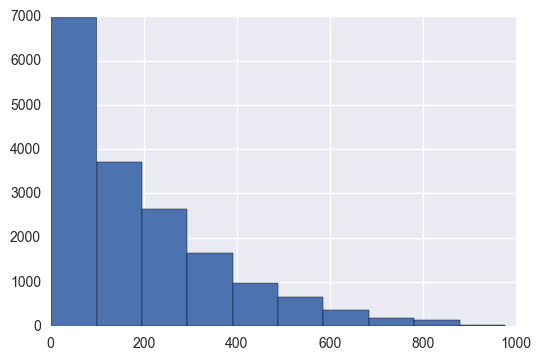

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

#read in data
bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())

#Histogram of the data
bike_rentals['cnt'].hist()

#sorted correlation of all parameters with prediction target cnt-column
corel = data_normal.corr()['cnt'].sort_values(ascending=False)
print(corel[(corel.abs()<1) & (corel.abs()>0.2)])

#pivot_table
table = pd.pivot_table(bike_rentals, values='cnt', index=['yr'], aggfunc=np.sum)
table

### Calculating Features <a id='feature'></a>

Create a new feature that adds up several hours to parts of the day.
    - 1 if the hour is from 6 to 12
    - 2 if the hour is from 12 to 18
    - 3 if the hour is from 18 to 24
    - 4 if the hour is from 0 to 6

In [45]:
def assign_label(x):
    if x < 7:
        return 4
    elif x<13:
        return 1
    elif x<19:
        return 2
    elif x>18:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(lambda x:assign_label(x))
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


### Preprocessing and Splitting the Data Into Train and Test Sets <a id='preprocess'></a>

- dropping columns that are not numerical
- normalize data
- create a train set with 80% of the date and a test set with the remaining 20%

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#drop columns
data_reduced = bike_rentals.drop(['instant','casual','registered','dteday'],axis=1)

#normalize data
scaler = MinMaxScaler()
data_normal = scaler.fit_transform(data_reduced)
data_normal = pd.DataFrame(data_normal,columns=data_reduced.columns)
data_normal['cnt']=data_reduced['cnt']
print(data_normal.head())

#choose features with high correlation with prediction target 
feature_list = ['atemp','hr','yr','hum','time_label'] 
print('data_normal length: {}'.format(data_normal.shape))

#create train (80%) and test (20%) set
train, test = train_test_split(data_normal, test_size=0.2, random_state=42)
print('train length: {}'.format(train.shape))
print('test length: {}'.format(test.shape))
train_x = train[feature_list]
train_y = train['cnt']
test_x = test[feature_list]
test_y = test['cnt']

   season   yr  mnth        hr  holiday  weekday  workingday  weathersit  \
0     0.0  0.0   0.0  0.000000      0.0      1.0         0.0         0.0   
1     0.0  0.0   0.0  0.043478      0.0      1.0         0.0         0.0   
2     0.0  0.0   0.0  0.086957      0.0      1.0         0.0         0.0   
3     0.0  0.0   0.0  0.130435      0.0      1.0         0.0         0.0   
4     0.0  0.0   0.0  0.173913      0.0      1.0         0.0         0.0   

       temp   atemp   hum  windspeed  cnt  time_label  
0  0.224490  0.2879  0.81        0.0   16         1.0  
1  0.204082  0.2727  0.80        0.0   40         1.0  
2  0.204082  0.2727  0.80        0.0   32         1.0  
3  0.224490  0.2879  0.75        0.0   13         1.0  
4  0.224490  0.2879  0.75        0.0    1         1.0  
data_normal length: (17379, 14)
train length: (13903, 14)
test length: (3476, 14)


### Applying Linear Regression <a id='lin_reg'></a>

- first try what results could be achieved with a simple linear regression
- root mean squarred error is chosen to handle positive and negative differences the same, to have a error measure which could easily be imagined and to make different models comparable
- the resulting RMSE of 128.9 is a good starting point, but leaves a lot of space for improvements

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
y_pred = pd.Series(y_pred)

scores = cross_val_score(model, data_normal[feature_list], data_normal['cnt'],
                         scoring="neg_mean_squared_error", cv=10)
reg_scores = np.sqrt(-scores)
print('mean_cross_val_scores: \n{}'.format(np.mean(reg_scores)))
print('\nPredicted y-values: \n{}'.format(y_pred.head()))
print('\nOriginal y-values: \n{}'.format(test_y.head()))

mean_cross_val_scores: 
128.90665026860057

Predicted y-values: 
0    365.231780
1    195.878366
2    -49.051784
3    336.661385
4    -71.184726
dtype: float64

Original y-values: 
12830    425
8688      88
7091       4
12230    526
431       13
Name: cnt, dtype: int64


### Applying Decision Trees <a id='tree'></a>

- now we try to predict bike rentals with a decision tree
- decision trees apply decision rules on the given parameters to predict an output
- the resulting RMSE of 123.3 is a small improvement compared to Linear Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_x, train_y)
y_pred = tree_reg.predict(test_x)
y_pred = pd.Series(y_pred)

scores = cross_val_score(tree_reg, data_normal[feature_list], data_normal['cnt'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print('mean_cross_val_scores: \n{}'.format(np.mean(tree_rmse_scores)))
print('\nPredicted y-values: \n{}'.format(y_pred.head()))
print('\nOriginal y-values: \n{}'.format(test_y.head()))

mean_cross_val_scores: 
123.3603448226504

Predicted y-values: 
0    360.0
1    112.0
2     12.0
3    442.0
4     53.0
dtype: float64

Original y-values: 
12830    425
8688      88
7091       4
12230    526
431       13
Name: cnt, dtype: int64


### Applying Random Forests <a id='forest'></a>

- Now we try to tune our model with a random forest algorithm
- random forests creates a lot of decision trees and uses the mean of this trees for prediction, which reduces decision trees' tendency to overfitting
- with random forest we get the best result, of all tested models with a rmse of 108.1

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)
y_pred = pd.Series(y_pred)

scores = cross_val_score(forest, data_normal[feature_list], data_normal['cnt'],
                         scoring="neg_mean_squared_error", cv=10)
forest_score = np.sqrt(-scores)
print('mean_cross_val_scores: \n{}'.format(np.mean(forest_score)))
print('\nPredicted y-values: \n{}'.format(y_pred.head()))
print('\nOriginal y-values: \n{}'.format(test_y.head()))

mean_cross_val_scores: 
108.08383216919569

Predicted y-values: 
0    422.40
1    134.70
2     15.25
3    443.00
4     13.00
dtype: float64

Original y-values: 
12830    425
8688      88
7091       4
12230    526
431       13
Name: cnt, dtype: int64


### Finding Best Parameters for Random Forest <a id='params'></a>

- Use scikit-learns GridSearchCV to find the best parameters for the Random Forest algorithm

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 81 (3×3x3x3) combinations of hyperparameters
    {'n_estimators': [10, 30, 50], 'max_features': [2, 4, 5], 'min_samples_split': [2,5,10], 'max_depth': [5,10,15]}
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 81*5=405 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_x, train_y)
print("grid search finished")

grid search finished


In [51]:
print('Best Parameters:\n{}'.format(grid_search.best_params_))

Best Parameters:
{'min_samples_split': 10, 'n_estimators': 50, 'max_features': 4, 'max_depth': 10}


In [52]:
print('Best Estimator:\n{}'.format(grid_search.best_estimator_))

Best Estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [53]:
cvres = grid_search.cv_results_
print('Results:')
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Results:
108.505436349 {'min_samples_split': 2, 'n_estimators': 10, 'max_features': 2, 'max_depth': 5}
109.321867402 {'min_samples_split': 2, 'n_estimators': 30, 'max_features': 2, 'max_depth': 5}
108.314243546 {'min_samples_split': 2, 'n_estimators': 50, 'max_features': 2, 'max_depth': 5}
108.541299893 {'min_samples_split': 5, 'n_estimators': 10, 'max_features': 2, 'max_depth': 5}
109.266457131 {'min_samples_split': 5, 'n_estimators': 30, 'max_features': 2, 'max_depth': 5}
108.329935155 {'min_samples_split': 5, 'n_estimators': 50, 'max_features': 2, 'max_depth': 5}
108.835451168 {'min_samples_split': 10, 'n_estimators': 10, 'max_features': 2, 'max_depth': 5}
109.444032617 {'min_samples_split': 10, 'n_estimators': 30, 'max_features': 2, 'max_depth': 5}
108.409329574 {'min_samples_split': 10, 'n_estimators': 50, 'max_features': 2, 'max_depth': 5}
108.794345306 {'min_samples_split': 2, 'n_estimators': 10, 'max_features': 4, 'max_depth': 5}
108.627948162 {'min_samples_split': 2, 'n_estima

### Results <a id='results'></a>

Best results are archived with a Random Forest algorithm and the following parameters: <br>
{'min_samples_split': 10, 'n_estimators': 50, 'max_features': 4, 'max_depth': 10}

In [56]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_x)
final_predictions = pd.Series(final_predictions)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print('Final RMSE on test set: {}'.format(final_rmse))
print('\nPredicted y-values: \n{}'.format(final_predictions.head()))
print('\nOriginal y-values: \n{}'.format(test_y.head()))

Final RMSE on test set: 86.84862295364098

Predicted y-values: 
0    513.332702
1    139.032670
2     15.070293
3    510.067630
4     20.579316
dtype: float64

Original y-values: 
12830    425
8688      88
7091       4
12230    526
431       13
Name: cnt, dtype: int64
